In [1]:
import torch
import torchvision
from torchvision import transforms

In [2]:
torch.cuda.is_available()

True

In [3]:
# model = TheModelClass(*args, **kwargs)
# model.load_state_dict(torch.load('./logs/checkpoints/best_full.pth'))
# model.eval()
model = torch.load('./model_1.pt')
model.eval()

FPN(
  (encoder): EfficientNetEncoder(
    (_conv_stem): Conv2dStaticSamePadding(
      3, 40, kernel_size=(3, 3), stride=(2, 2), bias=False
      (static_padding): ZeroPad2d(padding=(0, 1, 0, 1), value=0.0)
    )
    (_bn0): BatchNorm2d(40, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
    (_blocks): ModuleList(
      (0): MBConvBlock(
        (_depthwise_conv): Conv2dStaticSamePadding(
          40, 40, kernel_size=(3, 3), stride=[1, 1], groups=40, bias=False
          (static_padding): ZeroPad2d(padding=(1, 1, 1, 1), value=0.0)
        )
        (_bn1): BatchNorm2d(40, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
        (_se_reduce): Conv2dStaticSamePadding(
          40, 10, kernel_size=(1, 1), stride=(1, 1)
          (static_padding): Identity()
        )
        (_se_expand): Conv2dStaticSamePadding(
          10, 40, kernel_size=(1, 1), stride=(1, 1)
          (static_padding): Identity()
        )
        (

In [4]:
image_path='/root/kaggle/valid/seq16/Labels/000000.png'
image_path='/root/data/20220719_183951/package_3060/color_frame.png'
import numpy as np
from PIL import Image
from torchvision import transforms

trans = transforms.Compose([transforms.ToTensor()])

demo = Image.open(image_path)
height, width = demo.height, demo.width
print(height, width)
height += 32 - (demo.height % 32) if (demo.height % 32) > 0 else 0
width += 32 - (demo.width % 32) if (demo.width % 32) > 0 else 0
print(height, width)
background_color = (0, 0, 0)
result = Image.new(demo.mode, (width, height), background_color)
result.paste(demo, (0, 0))
demo_img = trans(result)
demo_array = np.moveaxis(demo_img.numpy()*255, 0, -1)
print(Image.fromarray(demo_array.astype(np.uint8)))

480 848
480 864
<PIL.Image.Image image mode=RGB size=864x480 at 0x7FD9ACE91A50>


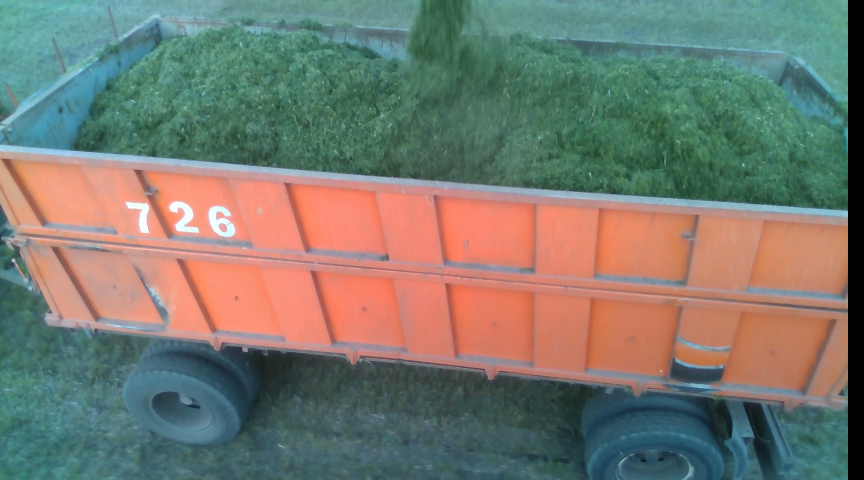

In [5]:
display(result)

In [6]:
import numpy as np
arr = np.random.random((64, 64, 3))
t = transforms.ToTensor()(arr)
t = t[None, :].cuda().float()
t.shape

torch.Size([1, 3, 64, 64])

In [7]:
pred = model.predict(t)

In [8]:
pred.shape

torch.Size([1, 8, 64, 64])

In [142]:
# import matplotlib.pyplot as plt
# plt.show(pred[0][0].float())

In [9]:
plt.imshow(pred[0][0].cpu())

NameError: name 'plt' is not defined

In [148]:
demo_img = demo_img[None, :].cuda()

p = model.predict(demo_img)

tensor([[0.4835, 0.4552, 0.4272,  ..., 0.9991, 0.9978, 0.9948],
        [0.4456, 0.3976, 0.3515,  ..., 0.9993, 0.9984, 0.9964],
        [0.4084, 0.3427, 0.2826,  ..., 0.9995, 0.9988, 0.9976],
        ...,
        [0.2212, 0.1567, 0.1084,  ..., 0.8192, 0.7776, 0.7296],
        [0.3628, 0.2867, 0.2211,  ..., 0.8620, 0.8233, 0.7767],
        [0.5329, 0.4651, 0.3985,  ..., 0.8959, 0.8613, 0.8176]],
       device='cuda:0')

In [136]:
import cv2

def apply_mask(img: np.array, mask: torch.tensor, p=0.5):
    sh = mash.shape
    
    img_ = img[:]
    
    for i in range(sh[0]):
        for j in range(sh[1]):
            if mask[i][j] > p:
                img[i][j] = np.array([255, 255, 255])
                
    cv2.imwrite("./masked_image.jpg", img_)
                    
    
    

torch.Size([1, 8, 480, 864])

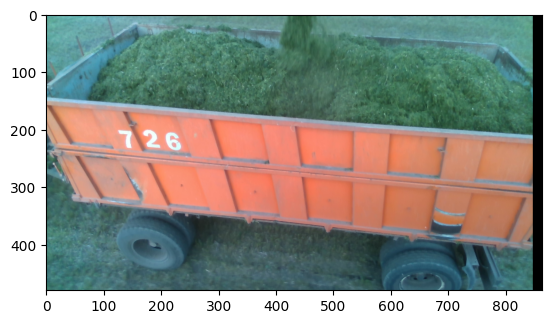

In [137]:
plt.imshow(result)

In [145]:
mask = p[0][0]
print(mask)

tensor([[0.4835, 0.4552, 0.4272,  ..., 0.9991, 0.9978, 0.9948],
        [0.4456, 0.3976, 0.3515,  ..., 0.9993, 0.9984, 0.9964],
        [0.4084, 0.3427, 0.2826,  ..., 0.9995, 0.9988, 0.9976],
        ...,
        [0.2212, 0.1567, 0.1084,  ..., 0.8192, 0.7776, 0.7296],
        [0.3628, 0.2867, 0.2211,  ..., 0.8620, 0.8233, 0.7767],
        [0.5329, 0.4651, 0.3985,  ..., 0.8959, 0.8613, 0.8176]],
       device='cuda:0')


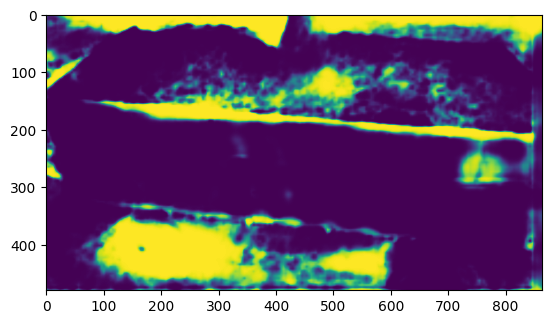

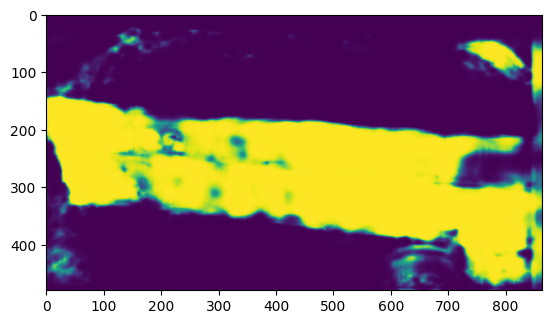

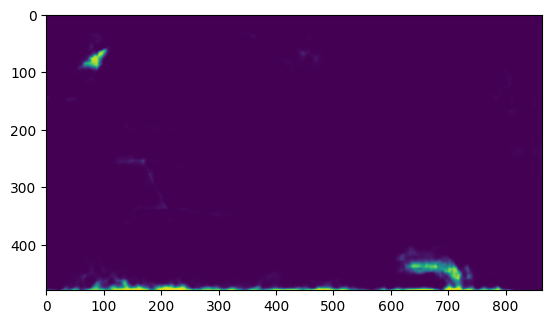

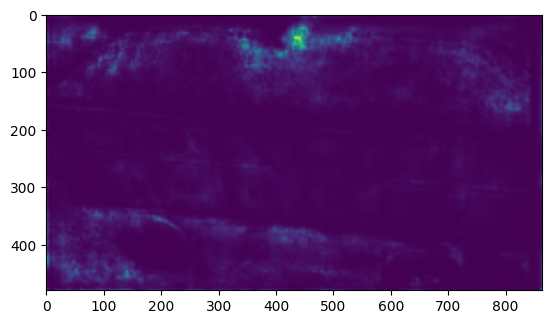

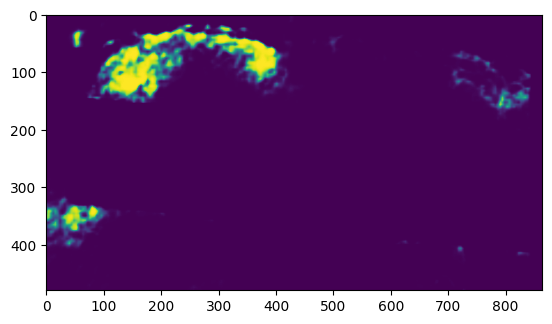

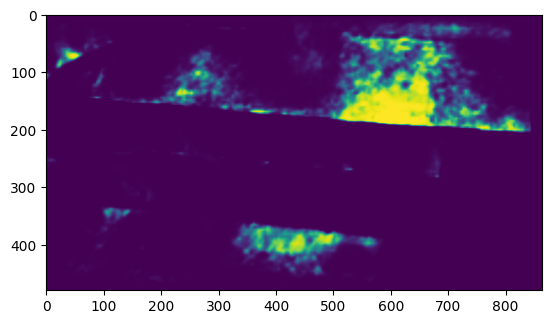

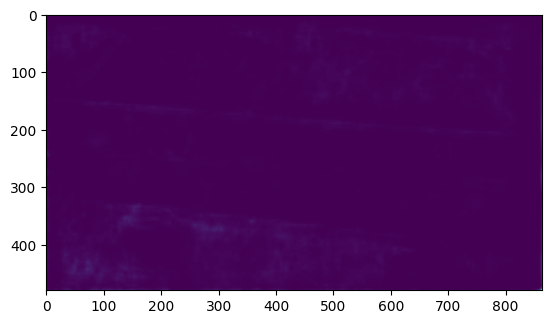

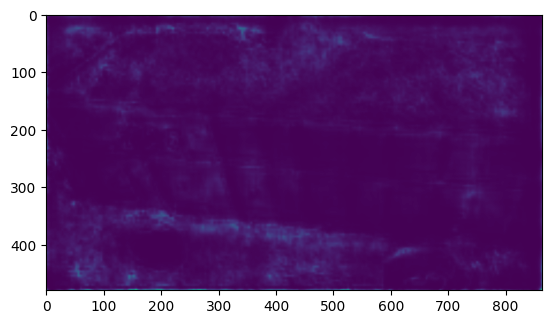

In [138]:
for mask in p[0]:
    plt.figure()
    plt.imshow(mask.cpu())

In [5]:
!pip install kaggle

You should consider upgrading via the '/root/venv/bin/python3.7 -m pip install --upgrade pip' command.


In [7]:
!chmod 600 /root/.kaggle/kaggle.json

In [11]:
import os
os.chdir(r'kaggle/working')

FileNotFoundError: [Errno 2] No such file or directory: 'kaggle/working'

In [12]:
!kaggle datasets download -d alexalex02/semantic-segmentation-of-aerial-images

Invalid dataset specification ./


In [13]:
!kaggle kernels output alexalex02/semantic-segmentation-of-aerial-images -p ./

Kernel log downloaded to ./semantic-segmentation-of-aerial-images.log 


In [10]:
!kaggle kernels output surajdidwania/dataset-download -p /path/to/dest


Kernel log downloaded to /path/to/dest/dataset-download.log 
